In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

%matplotlib inline

## Reading Dataset

In [2]:
df = pd.read_csv('./df_main_2.csv')

### EDA(Exploratory Data Analysis)

In [ ]:
df.keys()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isna().any()

In [3]:
df.RegDateDateSkey = pd.to_datetime(df.RegDateDateSkey, format='%Y-%m-%d')

In [4]:
df.RegDateDateSkey.min(), df.RegDateDateSkey.max()

(Timestamp('2021-11-23 00:00:00'), Timestamp('2023-07-23 00:00:00'))

In [7]:
# df.query('RegDateDateSkey=="2023-03-17"') # Reason is there are only return in this specific day
df.query('FB_NW < 0')

,BranchName,BusinessDocNo,BusinessDocTypeIDSKey,UnitSkey,RegDateDateSkey,BusinessDocAmount,ProductSKey,Jayezeh,ReturnPercent,BarghashtiAzFactor,...,PersianMonthName,Bargashti,Forush,Forush_Gweight,Bargasht_Gweight,Forush_Nweight,Bargasht_Nweight,FB_NW,MovAvg,MovStd
10,پخش تبریز,1402301600000093,75,17,2023-04-16,33480000.0,618,NaN,100.0,1402301500002095,...,فروردین,1.116000e+07,0.0,0.0,12.750,0.0,12.000,-12.000,NaN,NaN
11,پخش تبریز,1402301600000093,75,18,2023-04-16,33480000.0,618,NaN,100.0,1402301500002095,...,فروردین,5.580000e+06,0.0,0.0,6.200,0.0,6.000,-6.000,NaN,NaN
12,پخش تبریز,1402301600000339,75,18,2023-05-10,14985000.0,618,1.402302e+15,100.0,1402301500009928,...,اردیبهشت,2.895000e+06,0.0,0.0,3.100,0.0,3.000,-3.000,NaN,NaN
13,پخش تبریز,1402301600000420,75,18,2023-05-18,37492500.0,618,1.402302e+15,100.0,1402301500011928,...,اردیبهشت,5.790000e+06,0.0,0.0,6.200,0.0,6.000,-6.000,NaN,NaN
14,پخش تبریز,1402301600000050,75,17,2023-04-13,43056000.0,618,NaN,100.0,1401301500090265,...,فروردین,1.116000e+07,0.0,0.0,12.750,0.0,12.000,-12.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118126,پخش تبریز,1401301600003639,75,17,2023-03-11,41472000.0,366,1.401302e+15,100.0,1401301500089494,...,اسفند,2.232000e+07,0.0,0.0,15.000,0.0,14.400,-14.400,10.955067,27.206672
10118144,پخش تبریز,1401301600000473,75,17,2022-05-23,3355200.0,967,NaN,100.0,1401301500010064,...,خرداد,3.355200e+06,0.0,0.0,3.289,0.0,2.736,-2.736,7.871067,10.179736
10118418,پخش تبریز,1401301600002523,75,18,2022-12-06,1674000.0,23,NaN,100.0,1401301500059344,...,آذر,1.674000e+06,0.0,0.0,1.134,0.0,1.080,-1.080,6.109733,10.934346
10118419,پخش تبریز,1401301600002522,75,17,2022-12-06,20088000.0,23,NaN,100.0,1401301500059343,...,آذر,2.008800e+07,0.0,0.0,15.213,0.0,12.960,-12.960,5.611067,11.456879


## Adding New Feature

In [5]:
df['FB_NW'] = df['Forush_Nweight'] - df['Bargasht_Nweight']
df['MovAvg'] = df.FB_NW.rolling(window=30).mean()
df['MovStd'] = df.FB_NW.rolling(window=30).std()

In [7]:
df_test = pd.DataFrame(df.groupby('RegDateDateSkey')['FB_NW'].sum())
# for test dataset
df_test['MovAvg'] = df_test.FB_NW.rolling(window=30).mean()
df_test['MovStd'] = df_test.FB_NW.rolling(window=30).std()

In [8]:
df_test

,FB_NW,MovAvg,MovStd
RegDateDateSkey,,,
2021-11-23,930.760,NaN,NaN
2021-11-28,1333.192,NaN,NaN
2021-12-04,531.880,NaN,NaN
2021-12-08,332.464,NaN,NaN
2021-12-13,860.360,NaN,NaN
...,...,...,...
2023-07-19,97407.497,120004.702767,14085.361091
2023-07-20,88785.433,119192.711933,15155.895737
2023-07-21,76.800,115597.485233,26480.570195


In [9]:
df_test[['FB_NW', 'MovAvg', 'MovStd']].describe().T

,count,mean,std,min,25%,50%,75%,max
FB_NW,412.0,139301.525585,65335.360889,-1929.012000,114446.511750,139362.784500,172646.488000,444723.126000
MovAvg,383.0,145788.721214,41078.079869,15057.087967,119720.961833,138798.018233,160176.799017,241022.030633
MovStd,383.0,39563.154728,23522.867231,12506.231734,19399.559217,29819.744317,50651.981131,114781.703801


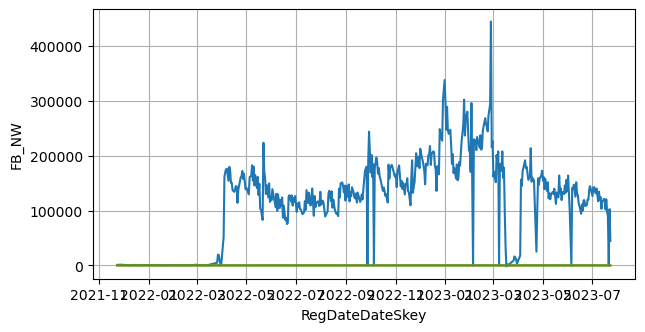

In [10]:
plt.figure(figsize=(7, 3.5));
sns.lineplot(data=df_test, x=df_test.index, y='FB_NW');
sns.lineplot(data=df_test, x=df.RegDateDateSkey, y=df.MovAvg);
sns.lineplot(data=df_test, x=df.RegDateDateSkey, y=df.MovStd);
plt.grid()

#### Stationary Testing
- $Null\ Hypothesis(H_0): Series \ is \ non-stationary, \ or \ series \ has \ a \ unit \ root$
- $Alternate \ Hypothesis(H_1): Series \ is \ stationary, \ or \ series \ has \ no \ unit \ root$
- $If \ Test \ statistic < Critical \ Value \ and \ p-value < 0.05 \ – \ Reject \ Null \ Hypothesis(H_O)$

In [11]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics', 'p-value', 'Lags Used', 'Number of observation used']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis, Time series is stationary, No unit root')
    else:
        print('Weak evidence against null hypothesis, Time series is non-stationary, may has unit root')

In [41]:
adfuller_test(df_test.FB_NW)

ADF Test Statistics : -2.3100024603839144
p-value : 0.16876227009689204
Lags Used : 12
Number of observation used : 371
Weak evidence against null hypothesis, Time series is non-stationary, may has unit root


## Autoregressive Formula
${X_{t}=\sum _{i=1}^{p}\varphi _{i}X_{t-i}+\varepsilon _{t}}$

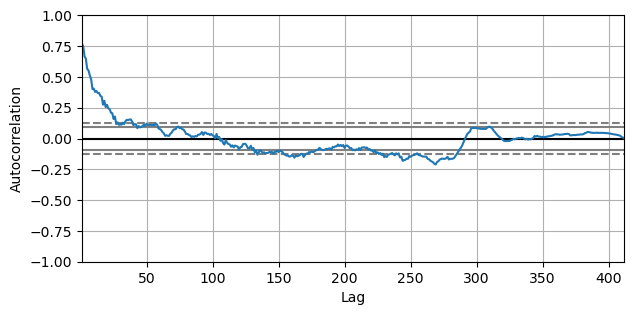

In [13]:
# Plot Autocorrelation of time series
plt.figure(figsize=(7, 3.2));
autocorrelation_plot(df_test.FB_NW)
plt.show()

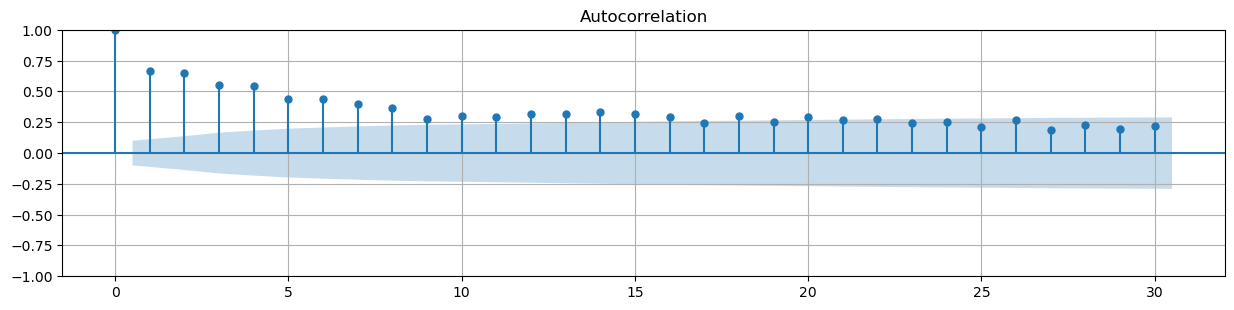

In [24]:
fig = plot_acf(df_test['FB_NW'], lags=30)
fig.set_size_inches((15, 3.2))
plt.grid()

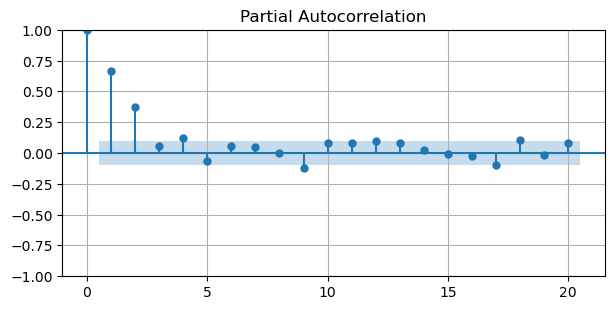

In [25]:
fig = plot_pacf(df_test['FB_NW'], lags=20)
fig.set_size_inches((7, 3.2))
plt.grid()

In [ ]:
df_test[df_test['FB_NW'] < 0]

In [16]:
df_test.reset_index(inplace=True)

In [18]:
df_test.drop(index=312, axis=0, inplace=True)

In [ ]:
df_test.set_index('RegDateDateSkey',inplace=True)

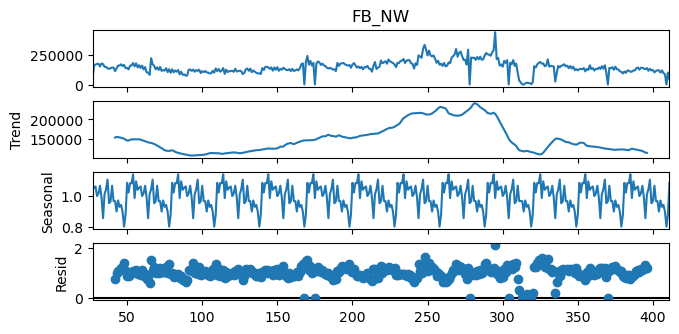

In [26]:
components = seasonal_decompose(df_test['FB_NW'], model='multiplicative', period=30) # additive, multiplicative
fig = components.plot()
fig.set_size_inches((7, 3.2))

#### Moving average and its noise function
$y_t = \mu + \sum _{q=1}^{n}{\theta_q}{\varepsilon}_{t-q}$

$\mathcal{E}_t = {\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$

## Train and Test Split

In [27]:
# Create train and test splits
split_size = int(0.7 * len(df_test.FB_NW))  # 70% train and 20% test
print(split_size)

# create train data
df_x_train = df_test.FB_NW[:split_size]  # :-split_size

# # create test data
df_y_test = df_test.FB_NW[split_size:]  # -split_size:

268


In [28]:
len(df_x_train), len(df_test), len(df_y_test)

(268, 384, 116)

In [29]:
df_test.iloc[268:]

,RegDateDateSkey,FB_NW,MovAvg,MovStd
295,2023-02-26,444723.126,241022.030633,65615.674987
296,2023-02-27,215451.100,240599.089167,65742.347086
297,2023-02-28,226237.945,240101.891500,65794.389322
298,2023-03-01,161616.172,236943.840300,67244.973224
299,2023-03-02,170425.608,232547.438033,67134.911146
...,...,...,...,...
407,2023-07-19,97407.497,120004.702767,14085.361091
408,2023-07-20,88785.433,119192.711933,15155.895737
409,2023-07-21,76.800,115597.485233,26480.570195
410,2023-07-22,102569.058,115878.355200,26289.157277


In [30]:
df_test.reset_index(inplace=True)

In [31]:
pred_ap = []
window = 1

for i in range(len(df_x_train), len(df_test), window):
    model = sm.tsa.statespace.SARIMAX(df_test.FB_NW[:i], order=(2, 22, 0))
    res = model.fit(disp=False)
    predictions = res.get_prediction(0, i + window - 1)
    oos_pred = predictions.predicted_mean.iloc[-window:]
    pred_ap.extend(oos_pred)

c:\Users\Ali Pira\anaconda3\envs\bulut\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ali Pira\anaconda3\envs\bulut\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ali Pira\anaconda3\envs\bulut\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ali Pira\anaconda3\envs\bulut\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ali Pira\anaconda3\envs\bulut\lib\s

In [32]:
df_y_test = pd.DataFrame(df_y_test)
df_x_train = pd.DataFrame(df_x_train)

In [33]:
df_y_test['pred_ap'] = pred_ap

In [34]:
df_y_test['date'] = df_test.RegDateDateSkey[268:]

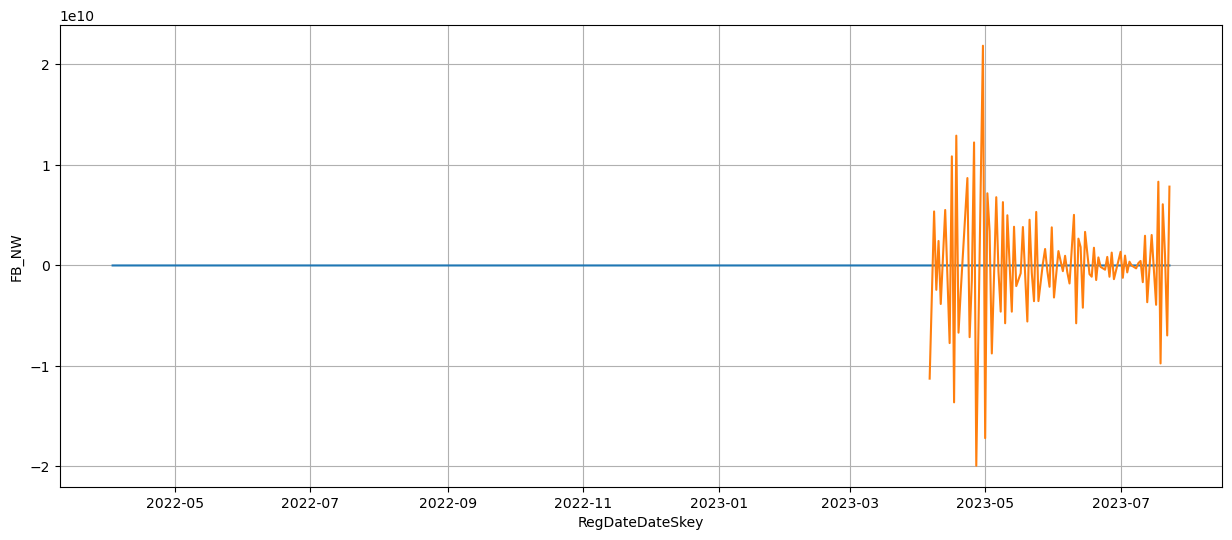

In [40]:
plt.figure(figsize=(15, 6));
sns.lineplot(data=df_test, x='RegDateDateSkey', y='FB_NW')
sns.lineplot(data=df_y_test, x='date', y='pred_ap')
#sns.lineplot(data=future, x='Dates', y='pred')
plt.grid()

In [38]:
df_y_test

,FB_NW,pred_ap,date
295,444723.126,-1.126186e+10,2023-04-06
296,215451.100,5.374261e+09,2023-04-08
297,226237.945,-2.423935e+09,2023-04-09
298,161616.172,2.437459e+09,2023-04-10
299,170425.608,-3.834526e+09,2023-04-11
...,...,...,...
407,97407.497,1.912232e+09,NaT
408,88785.433,-7.040609e+08,NaT
409,76.800,-2.868909e+08,NaT
410,102569.058,5.434635e+08,NaT
